In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]


In [13]:
from fredapi import Fred
fred_key = 'cb874f20dfe574c1823cc9e0bbf2f166'

# 1. Create The Fred Object

In [14]:

fred = Fred(api_key = fred_key)

# 2. Search for economic data

In [19]:
sp_search = fred.search('S&P' , order_by = 'popularity')

sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-09-04,2023-09-04,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-08-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 08:19:06-05:00,93,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-09-04,2023-09-04,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-08-29 08:11:02-05:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-09-04,2023-09-04,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-08-31,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 08:19:11-05:00,82,This data represents the effective yield of th...
SP500,SP500,2023-09-04,2023-09-04,S&P 500,2013-09-03,2023-09-01,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-09-01 19:10:59-05:00,82,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2023-09-04,2023-09-04,Real Median Household Income in the United States,1984-01-01,2021-01-01,Annual,A,2021 CPI-U-RS Adjusted Dollars,2021 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2022-09-13 13:48:01-05:00,81,Household data are collected as of March. As ...


# 3. Pull raw data and plot

In [25]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P500'}>

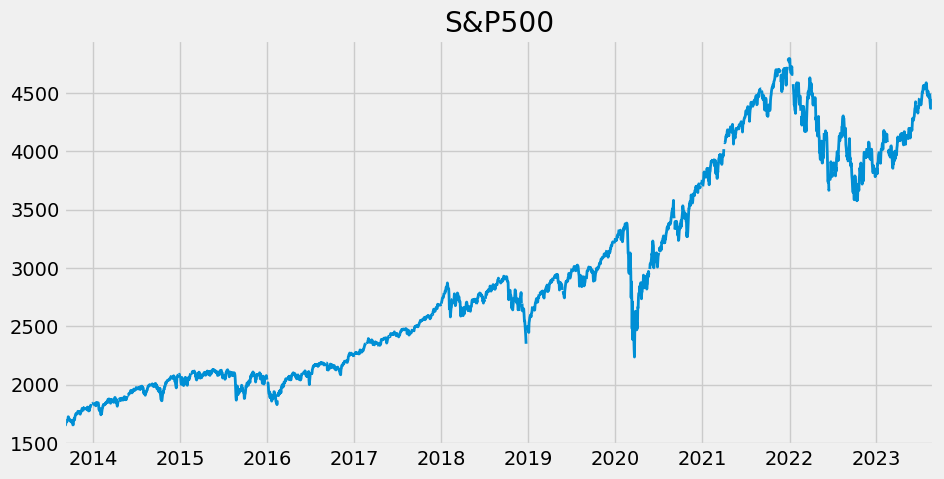

In [28]:
sp500.plot(figsize=(10,5), title = 'S&P500' , lw =2)

# 4. Pull and join multiple Data series

In [30]:
uemp_results = fred.search('unemployment')
uemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-04,2023-09-04,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-04,2023-09-04,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,53,The unemployment rate represents the number of...
CCSA,CCSA,2023-09-04,2023-09-04,Continued Claims (Insured Unemployment),1967-01-07,2023-08-19,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-08-31 07:33:03-05:00,74,"Continued claims, also referred to as insured ..."
UNEMPLOY,UNEMPLOY,2023-09-04,2023-09-04,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,68,The series comes from the 'Current Population ...
CCNSA,CCNSA,2023-09-04,2023-09-04,Continued Claims (Insured Unemployment),1967-01-07,2023-08-19,"Weekly, Ending Saturday",W,Number,Number,Not Seasonally Adjusted,NSA,2023-08-31 07:33:03-05:00,40,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNU04073395,LNU04073395,2023-09-04,2023-09-04,Unemployment Rate - Foreign Born,2007-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:46:33-05:00,5,The series comes from the 'Current Population ...
LNU04032236,LNU04032236,2023-09-04,2023-09-04,Unemployment Rate - Transportation and Utiliti...,2000-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:46:29-05:00,5,The series comes from the 'Current Population ...
LNS14000026,LNS14000026,2023-09-04,2023-09-04,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:46:27-05:00,5,To obtain estimates of women worker employment...


In [31]:
unrate = fred.get_series('UNRATE')

<Axes: >

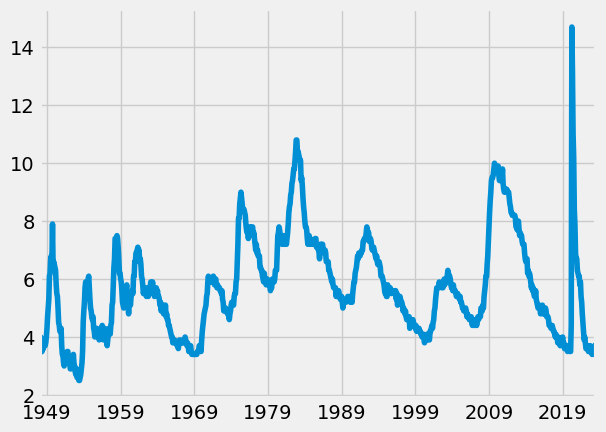

In [33]:
unrate.plot()

In [53]:
unemp_df = fred.search('unemployment rate state' , filter =('frequency' , 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment =="Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-09-04,2023-09-04,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:02-05:00,94,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-09-04,2023-09-04,Unemployment Rate,1948-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:45:34-05:00,53,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2023-09-04,2023-09-04,Unemployment Rate - Black or African American,1972-01-01,2023-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-09-01 07:45:24-05:00,69,The series comes from the 'Current Population ...
UNEMPLOY,UNEMPLOY,2023-09-04,2023-09-04,Unemployment Level,1948-01-01,2023-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-09-01 07:45:25-05:00,68,The series comes from the 'Current Population ...
LNU04000006,LNU04000006,2023-09-04,2023-09-04,Unemployment Rate - Black or African American,1972-01-01,2023-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-09-01 07:46:14-05:00,23,The series comes from the 'Current Population ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TXMONT0URN,TXMONT0URN,2023-09-04,2023-09-04,"Unemployment Rate in Montgomery County, TX",1990-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-30 10:15:30-05:00,2,These data come from the Current Population Su...
MTJEFF3URN,MTJEFF3URN,2023-09-04,2023-09-04,"Unemployment Rate in Jefferson County, MT",1990-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-30 10:14:05-05:00,2,These data come from the Current Population Su...
MDTALB1URN,MDTALB1URN,2023-09-04,2023-09-04,"Unemployment Rate in Talbot County, MD",1990-01-01,2023-07-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-08-30 10:12:24-05:00,2,These data come from the Current Population Su...
